# Book Recommendation System

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anssabrar","key":"368ba85cd64eb9ddfb32b0a3f59e5422"}'}

In [4]:
import os
# Create the Kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)
# Move kaggle.json to the Kaggle directory
!mv kaggle.json /root/.kaggle/


In [5]:
!kaggle datasets download -d zygmunt/goodbooks-10k

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
  0% 0.00/11.6M [00:00<?, ?B/s]
100% 11.6M/11.6M [00:00<00:00, 127MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('goodbooks-10k.zip', 'r') as zip_ref:
    zip_ref.extractall()


Uing kaggle dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from surprise import Reader, SVD, Dataset, accuracy
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate
warnings.filterwarnings('ignore')


df_booktags = pd.read_csv("book_tags.csv")
df_books = pd.read_csv("books.csv")
df_rating = pd.read_csv("ratings.csv")
df_tags = pd.read_csv("tags.csv")
df_toread = pd.read_csv("to_read.csv")

print("booksTags Data:    ", df_booktags.shape)
print("Books Data:    ", df_books.shape)
print("Books-ratings: ", df_rating.shape)
print("Tags:          ", df_tags.shape)
print("To-read:       ", df_toread.shape)

booksTags Data:     (999912, 3)
Books Data:     (10000, 23)
Books-ratings:  (981756, 3)
Tags:           (34252, 2)
To-read:        (912705, 2)


In [3]:
print("books columns", list(df_books.columns))

books columns ['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [4]:
print("Books Data:")
print(df_books.head(3))


Books Data:
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            480006

In [5]:
print("\nBook Tags Data:")
print(df_booktags.head())


Book Tags Data:
   goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716


In [6]:
print("\nRatings Data:")
print(df_rating.head())


Ratings Data:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [7]:
print("\nTags Data:")
print(df_tags.head())



Tags Data:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-


In [8]:
print("\nTo-Read Data:")
print(df_toread.head())


To-Read Data:
   user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874


### Check for missing values

In [9]:

print("\nBooks Data Missing Values:")
print(df_books.isnull().sum())

print ("*********************************")

print("\nBook Tags Data Missing Values:")
print(df_booktags.isnull().sum())

print ("*********************************")

print("\nRatings Data Missing Values:")
print(df_rating.isnull().sum())

print ("*********************************")

print("\nTags Data Missing Values:")
print(df_tags.isnull().sum())

print ("*********************************")

print("\nTo-Read Data Missing Values:")
print(df_toread.isnull().sum())


Books Data Missing Values:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
*********************************

Book Tags Data Missing Values:
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
*****************************

###Data Types and Summary Statistics

In [10]:
# Data types and summary statistics
print("\nBooks Data Info:")
print(df_books.info())
print("\nBooks Data Description:")
print(df_books.describe())

print ("*********************************")

print("\nBook Tags Data Info:")
print(df_booktags.info())
print("\nTags Data Description:")
print(df_booktags.describe())

print ("*********************************")

print("\nRatings Data Info:")
print(df_rating.info())
print("\nRatings Data Description:")
print(df_rating.describe())

print ("*********************************")

print("\nTags Data Info:")
print(df_tags.info())

print ("*********************************")

print("\nTo-Read Data Info:")
print(df_toread.info())



Books Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10

#Data Cleaning

In [11]:
# Removing duplicate entries
df_books = df_books.drop_duplicates()

# Handle missing values: Filling missing values or dropping rows/columns if necessary
df_books = df_books.fillna({'authors': 'Unknown', 'average_rating': df_books['average_rating'].mean()})


In [12]:
# Removing duplicate entries
df_rating = df_rating.drop_duplicates()

# Handle missing values
df_rating = df_rating.dropna()


#Exploratory Data Analysis (EDA)

###Analyze patterns in the data, such as popular genres, most reviewed books, or user rating distributions.
###Identify trends and correlations that might be useful for making recommendations.

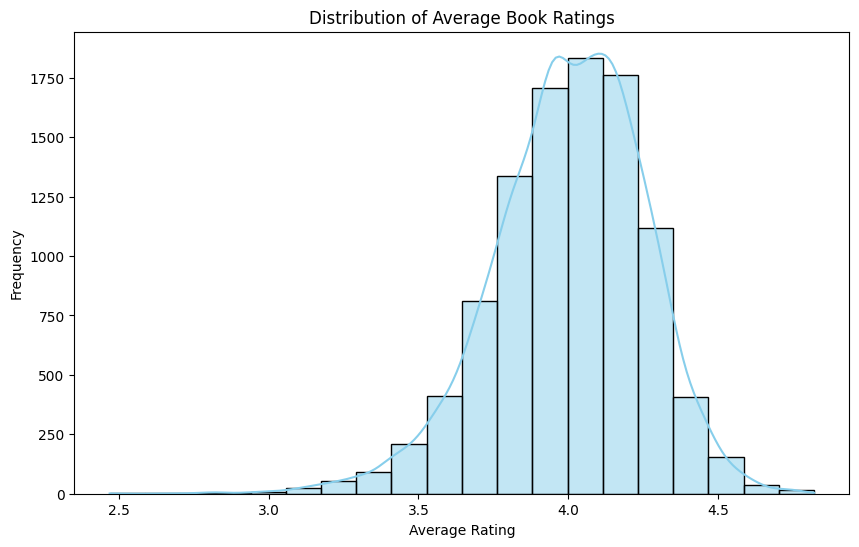

Top 10 Books by Average Rating:
                                                  title  average_rating
3627                     The Complete Calvin and Hobbes            4.82
3274  Harry Potter Boxed Set, Books 1-5 (Harry Potte...            4.77
861      Words of Radiance (The Stormlight Archive, #2)            4.77
8853                           Mark of the Lion Trilogy            4.76
7946                                    ESV Study Bible            4.76
4482  It's a Magical World: A Calvin and Hobbes Coll...            4.75
6360  There's Treasure Everywhere: A Calvin and Hobb...            4.74
421            Harry Potter Boxset (Harry Potter, #1-7)            4.74
6919                The Indispensable Calvin and Hobbes            4.73
3752       Harry Potter Collection (Harry Potter, #1-6)            4.73


In [13]:
# Distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_books['average_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 books by average rating
top_books = df_books[['title', 'average_rating']].sort_values(by='average_rating', ascending=False).head(10)
print("Top 10 Books by Average Rating:")
print(top_books)


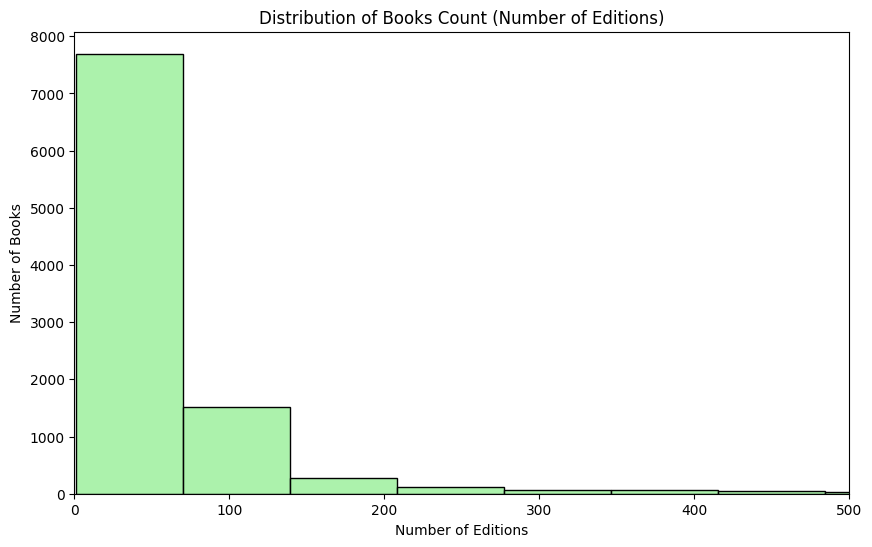

In [14]:
# Distribution of books count (number of editions)
plt.figure(figsize=(10, 6))
sns.histplot(df_books['books_count'], bins=50, kde=False, color='lightgreen')
plt.title('Distribution of Books Count (Number of Editions)')
plt.xlabel('Number of Editions')
plt.ylabel('Number of Books')
plt.xlim(0, 500)
plt.show()

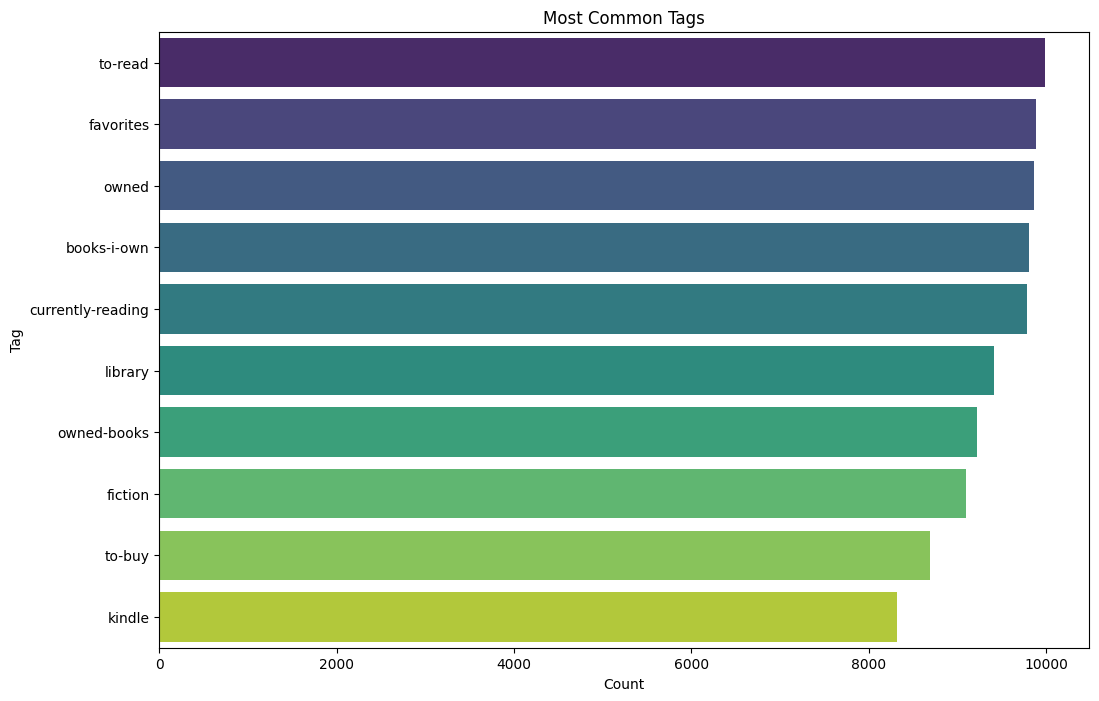

Most Common Tags:
tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
Name: count, dtype: int64


In [15]:
# Merge book tags with tags data
df_merged_tags = df_booktags.merge(df_tags, on='tag_id')

# Count the frequency of each tag
tag_counts = df_merged_tags['tag_name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')
plt.title('Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

print("Most Common Tags:")
print(tag_counts)


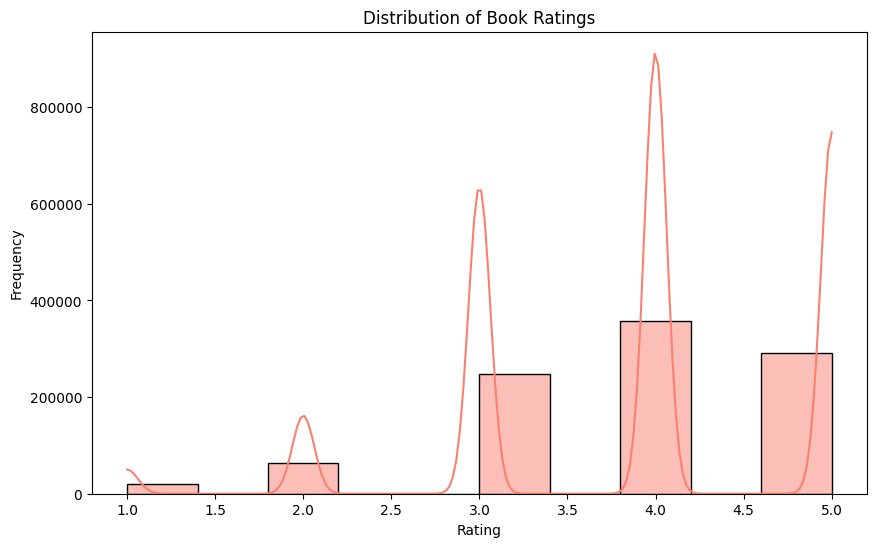

Top 10 Users by Average Rating Given:
user_id
53377    5.0
17       5.0
53375    5.0
53423    5.0
53370    5.0
37781    5.0
37768    5.0
37778    5.0
13474    5.0
37823    5.0
Name: rating, dtype: float64


In [16]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_rating['rating'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average rating by user
average_rating_by_user = df_rating.groupby('user_id')['rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Users by Average Rating Given:")
print(average_rating_by_user)


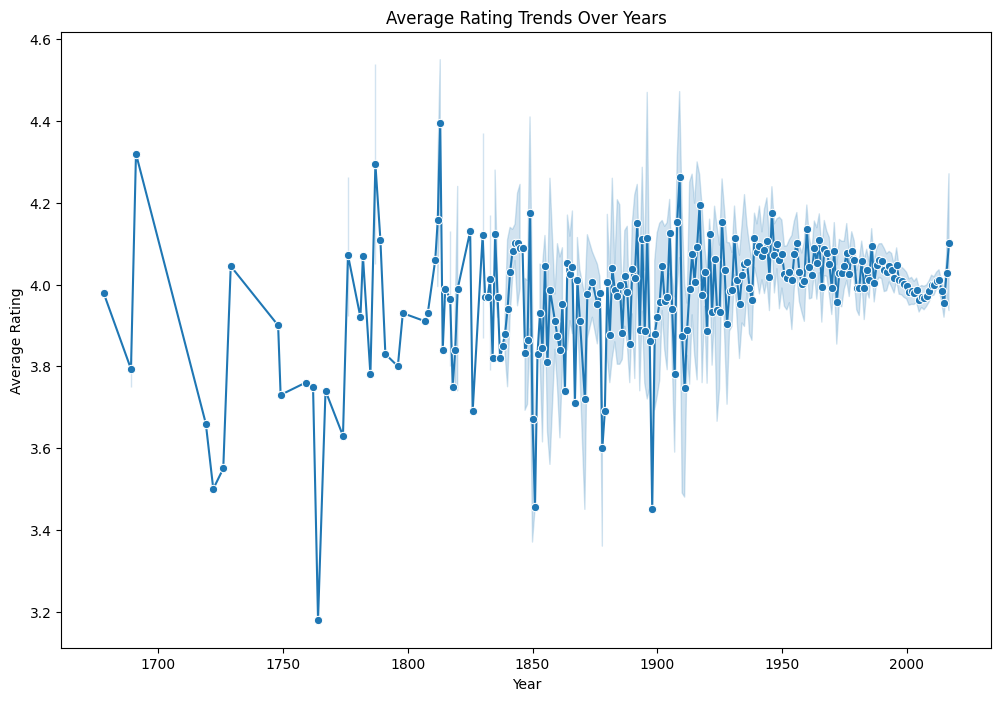

In [17]:
# Convert 'original_publication_year' to datetime
df_books['original_publication_year'] = pd.to_datetime(df_books['original_publication_year'], format='%Y', errors='coerce')
df_books['year'] = df_books['original_publication_year'].dt.year

# Rating trends over publication years
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='average_rating', data=df_books, marker='o')
plt.title('Average Rating Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


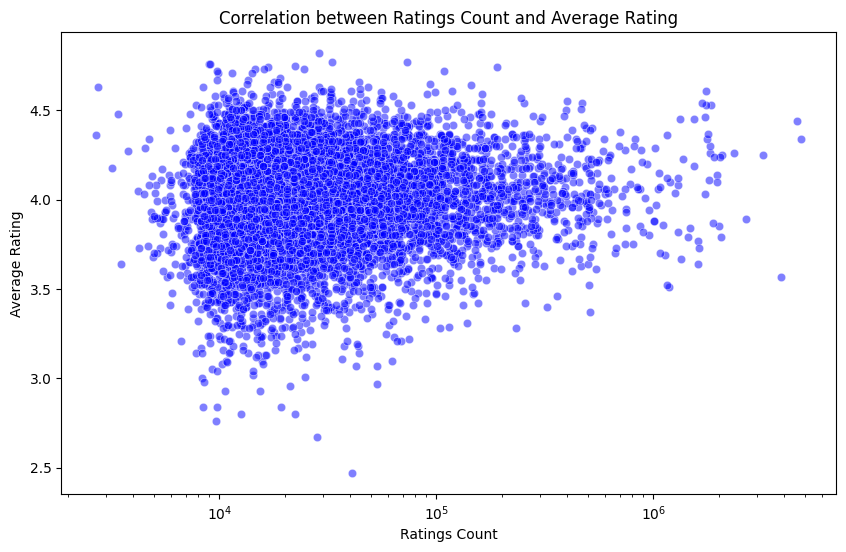

In [18]:
# Correlation between ratings count and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_books, x='ratings_count', y='average_rating', alpha=0.5, color='blue')
plt.title('Correlation between Ratings Count and Average Rating')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.xscale('log')  # Using logarithmic scale for better visualization
plt.show()

In [19]:
import unicodedata

# Remove special characters and convert to lowercase
df_tags['tag_name'] = df_tags['tag_name'].apply(lambda x: unicodedata.normalize('NFKC', x))
df_tags['tag_name'] = df_tags['tag_name'].str.replace('[^\w\s]', '', regex=True).str.lower()
df_tags['tag_name'] = df_tags['tag_name'].str.strip()

In [20]:
top_tags = df_booktags.groupby('goodreads_book_id').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)
top_tags = top_tags.merge(df_tags, how='left', on='tag_id')

In [21]:
books_tags_years = df_books.merge(top_tags, left_on='book_id', right_on='goodreads_book_id')

selected_genres = ['fantasy', 'romance', 'sciencefiction', 'nonfiction', 'mystery', 'historical', 'youngadult']

books_tags_years_filtered = books_tags_years[books_tags_years['tag_name'].isin(selected_genres)]

tags_by_year = books_tags_years_filtered.groupby(['original_publication_year', 'tag_name']).size().unstack(fill_value=0)

tags_by_year.tail()

tag_name,fantasy,mystery,nonfiction,romance,sciencefiction,youngadult
original_publication_year,,,,,,
2012-01-01,4,2,2,4,1,6
2013-01-01,3,5,1,11,2,1
2014-01-01,5,4,2,5,0,4
2015-01-01,5,1,0,1,0,2
2016-01-01,2,2,0,0,1,0


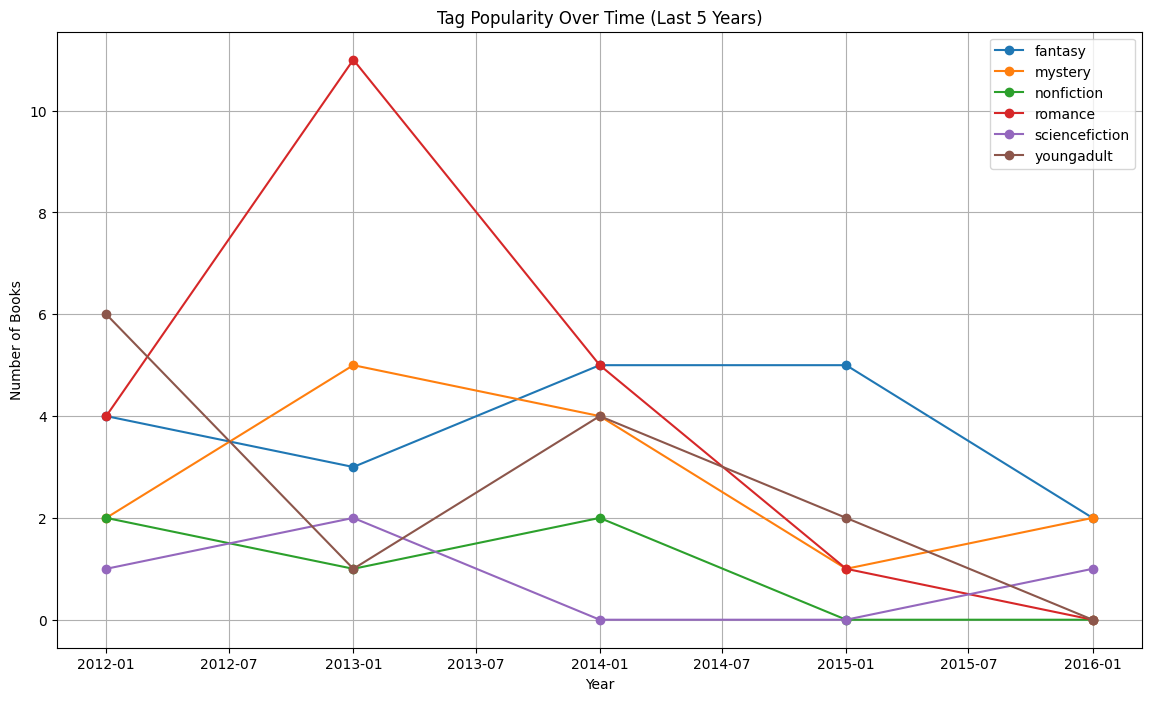

In [22]:
selected_years = tags_by_year.tail(5)  # Focus on the last 5 years available in the dataset

plt.figure(figsize=(14, 8))
for genre in selected_years.columns:
    plt.plot(selected_years.index, selected_years[genre], label=genre, marker='o')

plt.title('Tag Popularity Over Time (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
popular_genres = top_tags[top_tags['tag_name'].str.contains('fiction|fantasy|romance|thriller|historical|youngadult|classics|nonfiction', regex=True)]

books_with_genres = df_books.merge(popular_genres, left_on='book_id', right_on='goodreads_book_id')

average_ratings_by_genre = books_with_genres.groupby('tag_name')['average_rating'].mean().sort_values(ascending=False)

to_read_with_genres = df_toread.merge(books_with_genres[['book_id', 'tag_name']], on='book_id')
to_read_counts_by_genre = to_read_with_genres['tag_name'].value_counts().sort_values(ascending=False)

average_ratings_by_genre = pd.DataFrame(average_ratings_by_genre)

average_ratings_by_genre

,average_rating
tag_name,
christianfiction,4.415000
realisticfiction,4.340000
paranormalromance,4.286364
urbanfantasy,4.208125
historicalromance,4.130769
fantasy,4.086777
romance,4.056216
thriller,4.046000
sciencefiction,3.985000


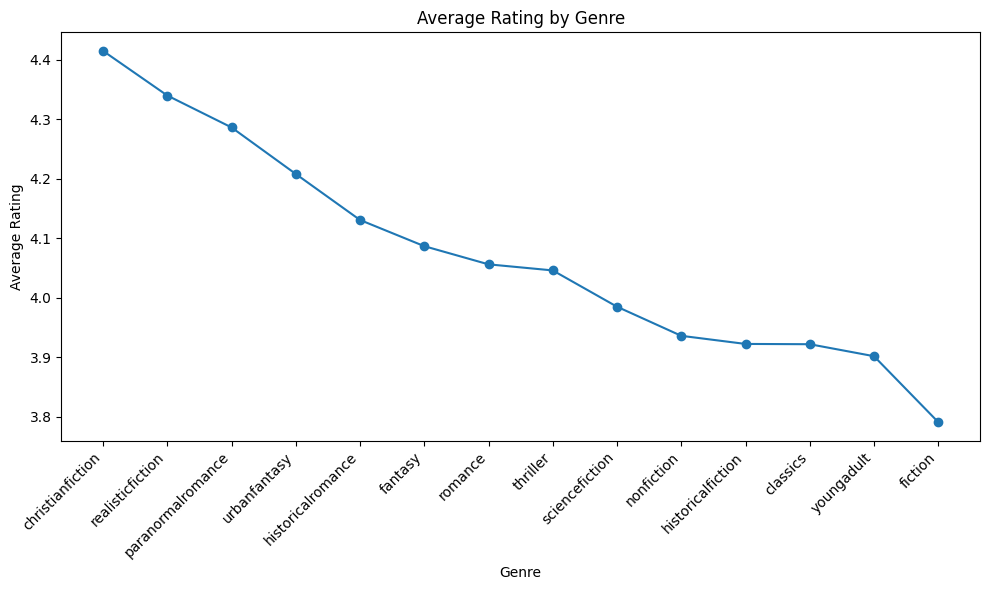

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_genre.index, average_ratings_by_genre['average_rating'], marker='o')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<Figure size 1000x600 with 0 Axes>

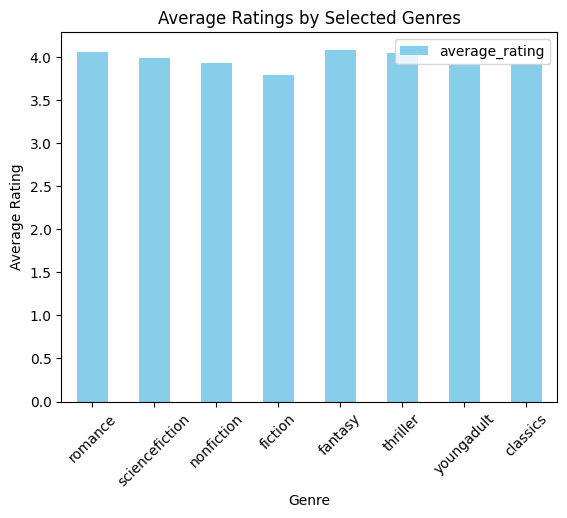

In [25]:
# Selecting a subset of genres for the graph to simplify
subset_genres = ['romance', 'sciencefiction', 'nonfiction',"fiction","fantasy","thriller", "youngadult", "classics"]
subset_average_ratings = average_ratings_by_genre.loc[subset_genres]

plt.figure(figsize=(10, 6))
subset_average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Selected Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Author Analysis: Highest Average Ratings and Most Books Published

books_expanded_authors = df_books.assign(authors=df_books['authors'].str.split(',')).explode('authors')
books_expanded_authors['authors'] = books_expanded_authors['authors'].str.strip()

author_stats = books_expanded_authors.groupby('authors').agg(
    average_rating=pd.NamedAgg(column='average_rating', aggfunc='mean'),
    books_published=pd.NamedAgg(column='book_id', aggfunc='count')
).reset_index()

authors_high_ratings = author_stats[author_stats['books_published'] >= 5].sort_values(by='average_rating', ascending=False).head(10)

authors_most_books = author_stats.sort_values(by='books_published', ascending=False).head(10)

authors_high_ratings = pd.DataFrame(authors_high_ratings)
authors_most_books = pd.DataFrame(authors_most_books)
authors_high_ratings

,authors,average_rating,books_published
626,Bill Watterson,4.703077,13
3729,Mary GrandPré,4.545556,9
4936,Sarah J. Maas,4.453077,13
3556,Malcolm Jones III,4.442000,5
1849,Gary Smalley,4.430000,5
1735,Fiona Staples,4.418571,7
5461,Todd Klein,4.416000,10
2869,Jorge Luis Borges,4.390000,5
5,A.A. Milne,4.386667,6
631,Bisco Hatori,4.381667,6


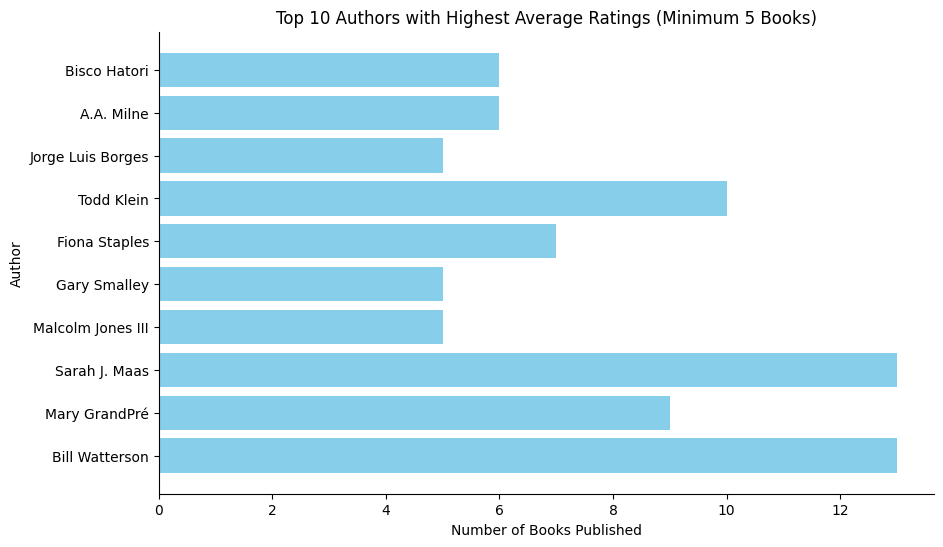

In [27]:
plt.figure(figsize=(10, 6))
plt.barh(authors_high_ratings['authors'], authors_high_ratings['books_published'], color='skyblue')
plt.xlabel('Number of Books Published')
plt.ylabel('Author')
plt.title('Top 10 Authors with Highest Average Ratings (Minimum 5 Books)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [28]:
authors_most_books

,authors,average_rating,books_published
2379,James Patterson,3.931735,98
5157,Stephen King,3.984227,97
4164,Nora Roberts,4.087692,65
1304,Dean Koontz,3.852969,64
5359,Terry Pratchett,4.134800,50
62,Agatha Christie,3.889302,43
2267,J.D. Robb,4.310976,41
4096,Neil Gaiman,4.198780,41
3812,Meg Cabot,3.798947,38
2426,Janet Evanovich,3.937027,37


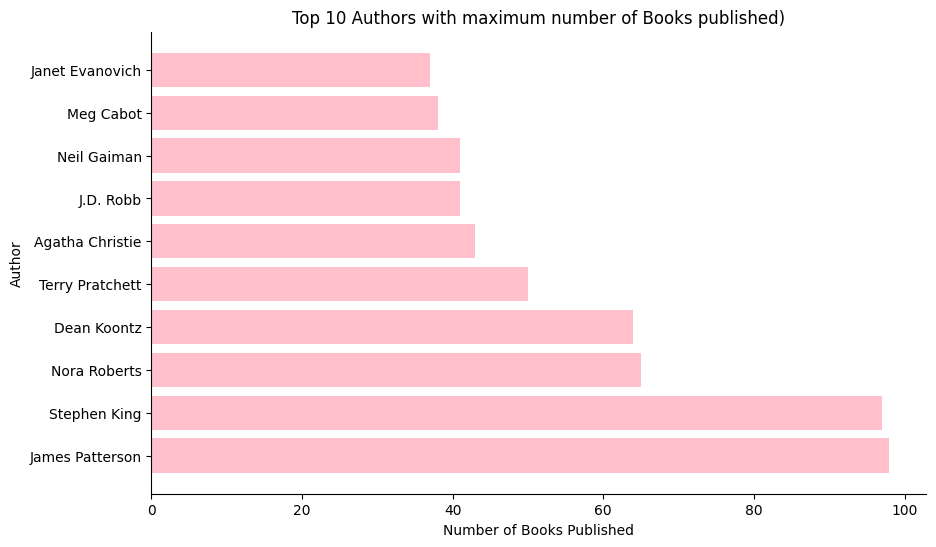

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(authors_most_books['authors'], authors_most_books['books_published'], color='pink')
plt.xlabel('Number of Books Published')
plt.ylabel('Author')
plt.title('Top 10 Authors with maximum number of Books published)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


#Model Selection

###Collaborative Filtering:

###User-Based:
          Recommend books based on the preferences of similar users.
###Item-Based:
            Suggest books similar to those a user has liked.


In [30]:
df = df_books.merge(df_rating, how="left", on="book_id")
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,year,user_id,rating
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008-01-01,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2008.0,NaN,NaN
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997-01-01,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1997.0,314.0,3.0
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997-01-01,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1997.0,588.0,1.0
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997-01-01,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1997.0,2077.0,2.0
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997-01-01,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,1997.0,2487.0,3.0


In [31]:
df.drop("language_code", axis=1,inplace=True)
df.drop("isbn", axis=1,inplace=True)
df.drop("isbn13", axis=1,inplace=True)
df.drop("original_title", axis=1,inplace=True)
df.drop("original_publication_year", axis=1,inplace=True)
df.drop("image_url", axis=1,inplace=True)
df.drop("small_image_url", axis=1,inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

,0
id,0
book_id,0
best_book_id,0
work_id,0
books_count,0
authors,0
title,0
average_rating,0
ratings_count,0
work_ratings_count,0


In [32]:
title_count = pd.DataFrame(df["title"].value_counts())
rare_books = title_count[title_count["count"] <= 5].index
common_books = df[~df["title"].isin(rare_books)]
common_books.head()

,id,book_id,best_book_id,work_id,books_count,authors,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,year,user_id,rating
1,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,1997.0,314.0,3.0
2,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,1997.0,588.0,1.0
3,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,1997.0,2077.0,2.0
4,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,1997.0,2487.0,3.0
5,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,1997.0,2900.0,3.0


In [33]:
user_book_df = common_books.pivot_table(index=["user_id"], columns=["title"], values="rating")
user_book_df

title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,...,"Women in Love (Brangwen Family, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,Zodiac,number9dream
user_id,,,,,,,,,,,,,,,,,,,,,
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
book_name = pd.Series(user_book_df.columns).sample(1,random_state=42).values[0]
book_name = user_book_df[book_name]

user_book_df.corrwith(book_name).sort_values(ascending=False).head(10)

,0
title,
Everyday Italian: 125 Simple and Delicious Recipes,1.0
Killing Yourself to Live: 85% of a True Story,1.0
The 48 Laws of Power,1.0
Corelli's Mandolin,1.0
Economics in One Lesson: The Shortest & Surest Way to Understand Basic Economics,1.0
"Ilium (Ilium, #1)",1.0
I am Charlotte Simmons,1.0
"Bleach, Volume 15",1.0
Heidi,1.0


###Collaborative Filtering: User-based and Item-based
User-based Collaborative Filtering

In [35]:
#select a random user
random_user = user_book_df.sample(1,random_state=689).index[0]

random_user_df = user_book_df[user_book_df.index == random_user]

books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

['What Is the What']

In [36]:
books_read_df = user_book_df[books_read]
user_book_count = books_read_df.T.notnull().sum()
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["userId", "book_count"]

user_same_books = user_book_count[user_book_count["book_count"] >= 1]["userId"]
user_same_books.head()

,userId
2485,4624.0
3384,6231.0
3405,6264.0
3516,6467.0
3619,6666.0


In [37]:
final_df = pd.concat([books_read_df[books_read_df.index.isin(user_same_books)],
                      random_user_df[books_read]])
final_df.head()

title,What Is the What
user_id,
4624.0,3.0
6231.0,5.0
6264.0,4.0
6467.0,5.0
6666.0,4.0


In [38]:
duplicated = final_df.index.duplicated()
final_df = final_df[~duplicated]

corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,4624.0,4624.0,NaN


In [39]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)

top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
top_users.head()

,user_id,corr


In [40]:
top_users_ratings = top_users.merge(df_rating[["user_id", "book_id", "rating"]], how='inner')

top_users_ratings = top_users_ratings[top_users_ratings["user_id"] != random_user]
top_users_ratings

,corr,user_id,book_id,rating


In [41]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']

top_users_ratings.groupby('book_id').agg({"weighted_rating": "mean"})

recommendation_df = top_users_ratings.groupby('book_id').agg({"weighted_rating": "mean"})

recommendation_df = recommendation_df.reset_index()

recommendation_df[recommendation_df["weighted_rating"] > 3.5]

books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.5].sort_values("weighted_rating", ascending=False)

books_to_be_recommend.merge(df_books[["book_id", "title"]]).head()

,weighted_rating,book_id,title


###Matrix Factorization¶
Matrix factorization recommendation involves decomposing a user-item rating matrix into two lower-dimensional matrices, which represent latent factors for users and items. These factors are then used to predict missing ratings and generate recommendations. The approach assumes that there are underlying patterns in user-item interactions that can be captured by a smaller set of factors.

In [42]:
user_id = df["user_id"].sample(1).values.tolist()[0]
user_id

16309.0

In [43]:
sample_user = df[df["user_id"] == user_id]
sample_user

,id,book_id,best_book_id,work_id,books_count,authors,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,year,user_id,rating
6060,150,4989,4989,1041558,80,Anita Diamant,The Red Tent,4.16,424981,449217,17234,9470,19616,67878,146178,206075,1997.0,16309.0,4.0
14172,487,7670,7670,997271,122,Michael Crichton,The Andromeda Strain,3.87,173186,178917,2555,1599,9379,48894,69876,49169,1969.0,16309.0,5.0
32032,1592,7667,7667,997270,78,Michael Crichton,Airframe,3.66,59229,63420,1482,1251,5523,20402,22606,13638,1996.0,16309.0,4.0
50038,3387,4796,4796,2359336,129,"John Steinbeck, Susan Shillinglaw",The Winter of Our Discontent,3.99,28050,30997,1538,362,1389,6734,12292,10220,1961.0,16309.0,5.0
51416,3570,4820,4820,461542,35,Nathaniel Philbrick,"Mayflower: A Story of Courage, Community, and War",3.86,25752,27463,2126,547,1573,6686,10958,7699,2006.0,16309.0,4.0
87429,9722,4657,4657,2342047,49,John Irving,The Water-Method Man,3.34,9725,10384,284,285,1524,4253,3031,1291,1972.0,16309.0,3.0


In [44]:
user_book = sample_user.pivot_table(index=["user_id"],
                                      columns=["book_id"],
                                      values="rating")
user_book.head()

book_id,4657,4796,4820,4989,7667,7670
user_id,,,,,,
16309.0,3.0,5.0,4.0,4.0,4.0,5.0


In [45]:
# Load the surprise dataset

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id',
                                       'book_id',
                                       'rating']], reader)

In [46]:
trainset, testset = train_test_split(data, test_size=.20)
svd_model = SVD()
svd_model.fit(trainset)
predictions = svd_model.test(testset)

accuracy.rmse(predictions)

RMSE: 0.9121


0.912111096224916

# Predicting ratings for the testset

In [47]:
svd_model.predict(uid=user_id, iid=119, verbose=True)


user: 16309.0    item: 119        r_ui = None   est = 4.15   {'was_impossible': False}


Prediction(uid=16309.0, iid=119, r_ui=None, est=4.148556421706223, details={'was_impossible': False})

# Evaluate the model

In [48]:

accuracy.rmse(svd_model.test(testset))

RMSE: 0.9121


0.912111096224916

In [49]:
param_grid = {'n_epochs': [5, 10, 20, 40],
              'lr_all': [0.002, 0.005, 0.007]}


gs = GridSearchCV(SVD,
                  param_grid,
                  measures=['rmse', 'mae'],
                  cv=3,
                  n_jobs=-1,
                  joblib_verbose=True)

gs.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  36 | elapsed:    5.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.7s finished


In [50]:
gs.best_score['rmse'], gs.best_params['rmse']


(0.9128680501599992, {'n_epochs': 40, 'lr_all': 0.005})

In [51]:
dir(svd_model)
svd_model.n_epochs

svd_model = SVD(**gs.best_params['rmse'])

data = data.build_full_trainset()
svd_model.fit(data)

svd_model.predict(uid=38756.0, iid=2155, verbose=True)

user: 38756.0    item: 2155       r_ui = None   est = 4.31   {'was_impossible': False}


Prediction(uid=38756.0, iid=2155, r_ui=None, est=4.313363799417523, details={'was_impossible': False})

In [52]:
def recommend(userid):
    not_read = df[df["user_id"] != user_id]["book_id"].drop_duplicates().values.tolist()
    recommend_list = {}
    for book_id in not_read:
        recommend_list[book_id] = svd_model.predict(uid=userid, iid=book_id)[3]
    recommend_df = pd.DataFrame(recommend_list.items()).sort_values(by=1, ascending=False)
    recommend_df.columns = ["book_id", "predicted_rating"]
    recommend_df = recommend_df.merge(df_books[["book_id", "title"]], on="book_id")
    return recommend_df

recommend(user_id).head(10)

,book_id,predicted_rating,title
0,5344,5.000000,Hard Times
1,3885,5.000000,The Taste of Home Cookbook
2,9566,5.000000,Still Life with Woodpecker
3,5346,5.000000,The Last Juror
4,9569,5.000000,Villa Incognito
5,976,4.993837,Deception Point
6,4921,4.981156,"Three Men in a Boat (Three Men, #1)"
7,8252,4.930222,"Farmer Boy (Little House, #3)"
8,4985,4.920090,Welcome to the Monkey House
9,9531,4.903789,Peter and the Shadow Thieves (Peter and the St...


###Hybrid Model: Combining Collaborative and Content-based Filtering

In [53]:
def user_based(user):
    random_user_df = user_book_df[user_book_df.index == user]
    books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
    books_read_df = user_book_df[books_read]
    user_book_count = books_read_df.T.notnull().sum()
    user_book_count = user_book_count.reset_index()
    user_book_count.columns = ["userId", "book_count"]
    user_same_books = user_book_count[user_book_count["book_count"] >= 1]["userId"]
    final_df = pd.concat([books_read_df[books_read_df.index.isin(user_same_books)],
                          random_user_df[books_read]])

    duplicated = final_df.index.duplicated()
    final_df = final_df[~duplicated]

    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['user_id_1', 'user_id_2']
    corr_df = corr_df.reset_index()
    top_users = corr_df[(corr_df["user_id_1"] == user) & (corr_df["corr"] >= 0.65)][
        ["user_id_2", "corr"]].reset_index(drop=True)
    top_users = top_users.sort_values(by='corr', ascending=False)
    top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
    top_users_ratings = top_users.merge(df_rating[["user_id", "book_id", "rating"]], how='inner')
    top_users_ratings = top_users_ratings[top_users_ratings["user_id"] != user]
    top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
    recommendation_df = top_users_ratings.groupby('book_id').agg({"weighted_rating": "mean"})
    recommendation_df = recommendation_df.reset_index()
    books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.5].sort_values("weighted_rating",
                                                                                                       ascending=False)
    user_based_df = books_to_be_recommend.merge(df_books[["book_id", "title"]])
    return user_based_df
def item_based_corr(book_name):
    book_name = user_book_df[book_name]
    item_based_df = user_book_df.corrwith(book_name).sort_values(ascending=False)
    return item_based_df

In [54]:
def hybrid_recommend(user_id,n=5):
    user_based_df = user_based(user_id)
    item_based_df = item_based_corr(pd.Series(user_book_df.loc[user_id].index.tolist()).sample(1).values[0])
    item_based_df = item_based_df.reset_index()
    item_based_df.columns = ["title", "corr"]
    matrix_factorization_df = recommend(user_id)
    merged_df = pd.merge(matrix_factorization_df[["book_id", "predicted_rating"]], user_based_df, on= "book_id", how="inner")
    merged_df["hybrid_rating"] = (merged_df["predicted_rating"] * merged_df["weighted_rating"])
    merged_df = merged_df.sort_values(by=["hybrid_rating"],ascending=False)
    item_based_df = item_based_df[item_based_df["corr"] >= 0.65].head(int(n/2))
    merged_df = pd.concat([item_based_df, merged_df]).drop_duplicates()
    return merged_df[["title"]].head(n).reset_index()[["title"]]

# Example prediction using hybrid model

In [55]:
hybrid_recommend(20467, 10)

,title
0,A Widow for One Year
1,The Summons
2,A Walk to Remember
3,The Atonement Child
4,Play It as It Lays
5,Children of Dune (Dune Chronicles #3)
6,Four Blondes
7,Time Enough for Love
8,The Ultimate Hitchhiker's Guide to the Galaxy
9,One Hundred Years of Solitude


# Deep Learning Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [57]:
# Prepare data for Deep Learning model
n_users = df_rating.user_id.nunique()
n_books = df_rating.book_id.nunique()

# Convert the user and book IDs to indices
df_rating['user_id'] = df_rating['user_id'].astype('category').cat.codes
df_rating['book_id'] = df_rating['book_id'].astype('category').cat.codes

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Prepare training data
X_train = df_rating[['user_id', 'book_id']].values
y_train = df_rating['rating'].values

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Make a prediction
user = np.array([1])  # User ID 1
book = np.array([3])  # Book ID 3
predicted_rating = model.predict(np.hstack([user[:, None], book[:, None]]))
print(f"Predicted rating for user {user[0]} and book {book[0]}: {predicted_rating[0][0]}")


Epoch 1/10
13783/13783 [==============================] - 29s 2ms/step - loss: 4959.0850 - val_loss: 0.9561
Epoch 2/10
13783/13783 [==============================] - 27s 2ms/step - loss: 1.1013 - val_loss: 0.9568
Epoch 3/10
13783/13783 [==============================] - 27s 2ms/step - loss: 1.1559 - val_loss: 0.9575
Epoch 4/10
13783/13783 [==============================] - 27s 2ms/step - loss: 0.9743 - val_loss: 0.9601
Epoch 5/10
13783/13783 [==============================] - 28s 2ms/step - loss: 0.9984 - val_loss: 0.9559
Epoch 6/10
13783/13783 [==============================] - 28s 2ms/step - loss: 0.9713 - val_loss: 0.9567
Epoch 7/10
13783/13783 [==============================] - 28s 2ms/step - loss: 0.9706 - val_loss: 0.9578
Epoch 8/10
13783/13783 [==============================] - 28s 2ms/step - loss: 0.9706 - val_loss: 0.9570
Epoch 9/10
13783/13783 [==============================] - 27s 2ms/step - loss: 0.9729 - val_loss: 0.9564
Epoch 10/10
1/1 [==============================] - 0

# RMSE for Deep Learning Model
 (Root Mean Square Error)

In [58]:
# y_pred = model.predict(X_train)
# rmse = np.sqrt(np.mean((y_train - y_pred)**2))
# print(f'Deep Learning Model RMSE: {rmse}')


#Save the Model

In [59]:
import pickle

# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(svd_model, open(filename, 'wb'))


#Visualize the Model's Predictions

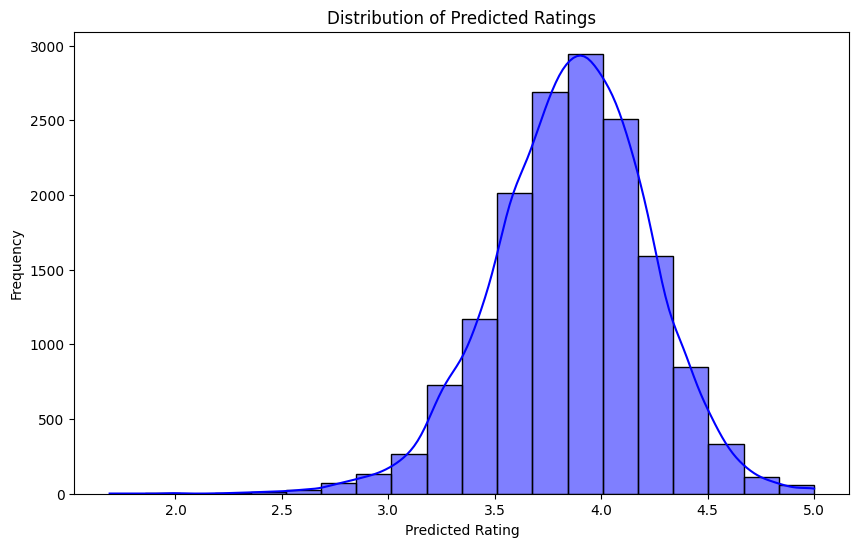

In [60]:
# Extract predicted ratings
predicted_ratings = [pred.est for pred in predictions]

# Plotting the distribution of predicted ratings
plt.figure(figsize=(10, 6))
sns.histplot(predicted_ratings, bins=20, kde=True, color='blue')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.show()


#Load and Use the Model Later

In [61]:
# Load the model from disk
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

# Make a new prediction
new_prediction = loaded_model.predict(user_id, book_id).est
print(f"New predicted rating for user {user_id} and book {book_id}: {new_prediction}")


New predicted rating for user 16309.0 and book 123: 4.18096762093787
